In [52]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
import os
from scipy.stats import ncx2
import warnings
import upsetplot

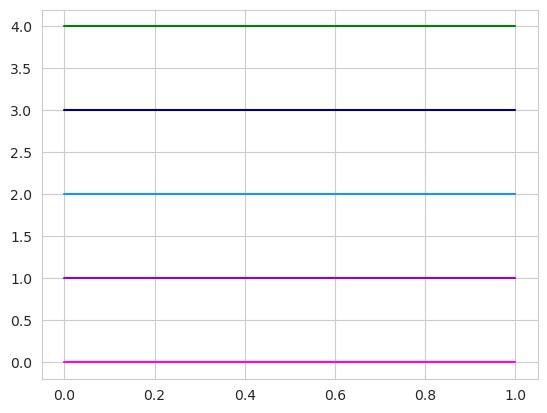

In [53]:
colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'mediumspringgreen',
          'g']

colors = ['fuchsia',
          'darkviolet',
          'dodgerblue',
          'navy',
          'g']

#colors = colors[:3]

mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)

for i in range(len(colors)):
    plt.plot([0, 1], [i, i])

plt.show()

new_cmap = mpl.colors.ListedColormap(colors)

colors2 = [c for c in colors]
colors2.insert(0, 'k')
new_cmap2 = mpl.colors.ListedColormap(colors2)

In [54]:
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Heterogeneity/')

In [55]:
rahmioglu_b38 = pd.read_table('../Locus_Extraction/Rahmioglu_snps_b38.bed', index_col=3, header=None)
# rahmioglu_b38 = rahmioglu_b38.rename({'rs7334326': 'rs9568405'})
# rahmioglu_b38.loc['rs9568405', 1] = 50405519
rahmioglu = pd.read_csv('Rahmioglu_processed_signals.csv', index_col='Lead SNP').rename(columns={'Unnamed: 0': 'Signal'})
# rahmioglu = rahmioglu.rename({'rs7334326': 'rs9568405'})

rahmioglu['Position (b38)'] = rahmioglu_b38.loc[rahmioglu.index.intersection(rahmioglu_b38.index), 1]
rahmioglu['START'] = rahmioglu['Position (b38)'] - 5E5
rahmioglu['STOP'] = rahmioglu['Position (b38)'] + 5E5
rahmioglu = rahmioglu[~rahmioglu['Chr'].isin(['X'])]
rahmioglu['Chr'] = rahmioglu['Chr'].astype(int)

rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']] = rahmioglu[['Chr', 'Position (b38)', 'START', 'STOP']].astype(float)

print(len(rahmioglu))
rahmioglu = rahmioglu.dropna(subset=['Infertility_OR'])
print(len(rahmioglu))

sig_line = 0.05 / len(rahmioglu)
print(sig_line)
rahmioglu

41
39
0.001282051282051282


,Signal,Chr,Position (hg19),Overall_OR,Overall_P,EUR_RAF,EUR_OR,EUR_P,JPT_RAF,JPT_OR,...,Stage34_OR_CI,Stage34_BETA,Stage12_OR_CI,Stage12_BETA,Infertility_OR_CI,Infertility_BETA,Risk_Allele,Position (b38),START,STOP
Lead SNP,,,,,,,,,,,,,,,,,,,,,
rs10917151,WNT4/1p36.12,1.0,22422721.0,1.14,5.08x10-44,0.16,1.14,3.64x10-41,0.57,1.27,...,(1.16-1.31),0.207014,(1.08-1.24),0.148420,(1.13-1.31),0.190620,A,22096228.0,21596228.0,22596228.0
rs12030576,NGF/1p13.2,1.0,115817221.0,1.06,3.34x10-13,0.65,1.06,1.91x10-13,0.41,0.99,...,(0.97-1.08),0.029559,(1.02-1.15),0.086178,(0.98-1.11),0.039221,G,115274600.0,114774600.0,115774600.0
rs2040445,SLC19A2/1q24.2,1.0,169216412.0,1.17,1.40x10-10,0.97,1.17,1.96x10-10,NaN,NaN,...,(1.28-1.83),0.425268,(0.84-1.24),0.019803,(1.07-1.55),0.254642,G,169247174.0,168747174.0,169747174.0
rs2421985,DNM3/1q24.3,1.0,172099136.0,1.05,6.73x10-14,0.49,1.05,1.72x10-12,0.77,1.28,...,(1.04-1.14),0.086178,(0.97-1.07),0.019803,(0.96-1.07),0.009950,C,172129996.0,171629996.0,172629996.0
rs11674184,GREB1/2p25.1,2.0,11721535.0,1.08,3.16x10-26,0.61,1.08,5.91x10-24,0.54,1.25,...,(1.10-1.22),0.148420,(1.02-1.14),0.067659,(0.99-1.12),0.048790,T,11581409.0,11081409.0,12081409.0
rs1430787,ETAA1/2p14,2.0,67868498.0,1.04,9.65x10-9,0.31,1.04,4.56x10-8,0.22,1.17,...,(1.05-1.16),0.095310,(1.02-1.14),0.076961,(1.01-1.14),0.067659,A,67641366.0,67141366.0,68141366.0
rs6435157,BMPR2/2q33.1,2.0,203441224.0,1.05,4.97x10-8,0.77,1.05,1.12x10-7,0.97,1.42,...,(1.06-1.19),0.122218,(1.01-1.15),0.076961,(1.07-1.22),0.131028,T,202576501.0,202076501.0,203076501.0
rs1352889,BSN/3p21.31,3.0,49652148.0,1.05,2.79x10-8,0.17,1.05,2.79x10-8,NaN,NaN,...,(0.95-1.08),0.019803,(0.98-1.13),0.048790,(0.98-1.13),0.048790,T,49614715.0,49114715.0,50114715.0
rs1903068,KDR/4q12,4.0,56008477.0,1.08,1.55x10-24,0.68,1.08,1.78x10-24,0.88,1.09,...,(1.16-1.29),0.198851,(1.03-1.15),0.086178,(1.05-1.18),0.104360,A,55142310.0,54642310.0,55642310.0


In [56]:
snp_annot = pd.read_csv('../1KG_LD_Testing/Annotations/tags_biofilter_genes_rsids.csv')
snp_annot = snp_annot.set_index(['#CHROM', 'POS'])
snp_annot = snp_annot[~snp_annot.index.duplicated(keep='first')]
snp_annot

Var_ID         RSID         Gene
#CHROM POS                                         
1      21686033      snp1   rs12043791        USP48
       21720782      snp2   rs12029478        USP48
       21722171      snp3   rs12030578        USP48
       21772447      snp4   rs10917041        USP48
       21779075      snp5    rs6664248        USP48
...                   ...          ...          ...
19     8703043   snp11791     rs301404  ACTL9/OR2Z1
       8703125   snp11792   rs35276077  ACTL9/OR2Z1
       8704019   snp11793  rs111407982  ACTL9/OR2Z1
       8708507   snp11794   rs10406865  ACTL9/OR2Z1
       8708650   snp11795   rs10411579  ACTL9/OR2Z1

[11792 rows x 3 columns]

In [57]:
meta_group = 'AFR_EUR' # ALL, AFR_EUR, EUR

phenos = ['endometriosis',
          'cluster_vs_controls_1',
          'cluster_vs_controls_2',
          'cluster_vs_controls_3',
          'cluster_vs_controls_4',
          'cluster_vs_controls_5']

In [58]:
dfs = []
for p in phenos:
    if p == 'endometriosis':
        continue
    f = f'Meta_Output_Negative_Control/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None, index_col=['CHR', 'BP'])
    temp['RSID'] = snp_annot.reindex(temp.index)['RSID'].values
    temp['PHENO'] = p
    temp = temp.reset_index().set_index('SNP')
    var = pd.read_csv(f'Meta_Output_Negative_Control/{p}.{meta_group}.variant_info', index_col='ID')
    temp = pd.concat([temp, var], axis=1)
    temp.index.name = 'SNP'
    temp = temp.reset_index()
    dfs.append(temp)

df_nc = pd.concat(dfs)
df_nc[['CHR', 'POS', 'REF', 'ALT']] = df_nc['SNP'].str.replace('chr', '').str.split(':', expand=True)
df_nc[['CHR', 'POS']] = df_nc[['CHR', 'POS']].astype(int)

def get_chr_pos_signal(x):
    keep_index = rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                           (rahmioglu['START'] < x['POS']) &
                           (rahmioglu['STOP'] > x['POS'])].index
    if len(keep_index) == 0:
        return np.nan
    else:
        return keep_index[0]

df_nc['Signal_RSID'] = df_nc[['CHR', 'POS']].apply(lambda x: get_chr_pos_signal(x), axis=1)
df_nc = df_nc.dropna(subset=['Signal_RSID', 'P'])

if meta_group in ['EUR', 'AFR']:
    p_col, or_col = 'P', 'OR'
    model_used = 'Fixed-Effect'
    m_u = 'FE'
else:
    p_col, or_col = 'P(R)', 'OR(R)'
    model_used = 'Random-Effect'
    m_u = 'RE'

df_nc['Signal'] = rahmioglu.loc[df_nc['Signal_RSID'], 'Signal'].values
df_nc['LOGP'] = -np.log10(df_nc[p_col])
df_nc = df_nc.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df_nc['BETA'] = np.log(df_nc[or_col])
df_nc['Direction'] = np.sign(df_nc['BETA'])
df_nc['Z'] = df_nc['Direction'] * np.abs(norm.ppf(df_nc[p_col] / 2))
df_nc['SE'] = df_nc['BETA'] / df_nc['Z']
df_nc['CI_L'] = df_nc['BETA'] - (1.96 * df_nc['SE'])
df_nc['CI_U'] = df_nc['BETA'] + (1.96 * df_nc['SE'])

df_nc['CI_OR_L'] = np.exp(df_nc['CI_L'])
df_nc['CI_OR_U'] = np.exp(df_nc['CI_U'])

df_nc['MAF'] = df_nc['Meta_AF'].apply(lambda x: min([x, 1-x]))
df_nc['Var_Exp'] = (2 * df_nc['MAF'] * (1 - df_nc['MAF']) * (df_nc['BETA'] ** 2)).astype(float)
df_nc['Sigma'] = np.sqrt(1 - df_nc['Var_Exp'])

df_nc['KNOWN_BETA'] = np.log(rahmioglu.loc[df_nc['Signal_RSID'], 'Overall_OR']).values
df_nc['PWR_SE'] = df_nc['Sigma'] / np.sqrt(df_nc['Neff_meta'] * 2 * df_nc['MAF'] * (1-df_nc['MAF']))

df_nc['Z'] = (df_nc['KNOWN_BETA'] / df_nc['PWR_SE']).astype(float)
df_nc['CHI2'] = df_nc['Z'] ** 2

q_thresh = float(ncx2.ppf(1 - 5E-8, df=1, nc=0))
df_nc['Power'] = 1 - ncx2.cdf(q_thresh, df=1, nc=df_nc['CHI2'].values)

df_nc

,SNP,CHR,BP,A1,A2,N,P,P(R),OR,OR(R),...,CI_U,CI_OR_L,CI_OR_U,MAF,Var_Exp,Sigma,KNOWN_BETA,PWR_SE,CHI2,Power
0,chr1:21686033:C:T,1,21686033,T,?,7,0.01291,0.01291,0.8747,0.8747,...,-0.028336,0.787090,0.972062,0.149865,0.004567,0.997714,0.131028,0.049524,7.000004,0.002511
1,chr1:21686033:C:T,1,21686033,T,?,7,0.75170,0.75310,1.0156,1.0157,...,0.112645,0.921743,1.119235,0.149925,0.000062,0.999969,0.131028,0.044799,8.554390,0.005760
2,chr1:21686033:C:T,1,21686033,T,?,7,0.67850,0.67850,1.0188,1.0188,...,0.106695,0.932912,1.112595,0.149905,0.000088,0.999956,0.131028,0.042948,9.307556,0.008187
3,chr1:21686033:C:T,1,21686033,T,?,7,0.51340,0.97380,0.9699,0.9978,...,0.129235,0.874905,1.137957,0.149812,0.000001,0.999999,0.131028,0.043470,9.085560,0.007403
4,chr1:21686033:C:T,1,21686033,T,?,6,0.17210,0.58090,1.0498,1.0411,...,0.183275,0.902380,1.201145,0.151858,0.000418,0.999791,0.131028,0.035442,13.667282,0.039683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49331,chr19:8704019:C:T,19,8704019,T,?,7,0.95090,0.95090,1.0032,1.0032,...,0.104889,0.906196,1.110587,0.152246,0.000003,0.999999,0.058269,0.049317,1.395988,0.000010
49332,chr19:8704019:C:T,19,8704019,T,?,7,0.08608,0.15580,1.0842,1.0864,...,0.197306,0.968926,1.218117,0.152314,0.001773,0.999113,0.058269,0.044471,1.716803,0.000017
49333,chr19:8704019:C:T,19,8704019,T,?,7,0.65620,0.65620,1.0195,1.0195,...,0.104342,0.936396,1.109980,0.152301,0.000096,0.999952,0.058269,0.042669,1.864857,0.000022
49334,chr19:8704019:C:T,19,8704019,T,?,7,0.67900,0.67900,1.0191,1.0191,...,0.108529,0.931751,1.114638,0.152258,0.000092,0.999954,0.058269,0.043180,1.821032,0.000020


In [59]:
df_nc[df_nc['P(R)'] < sig_line]

,SNP,CHR,BP,A1,A2,N,P,P(R),OR,OR(R),...,CI_U,CI_OR_L,CI_OR_U,MAF,Var_Exp,Sigma,KNOWN_BETA,PWR_SE,CHI2,Power
533,chr1:22021916:G:A,1,22021916,A,?,6,0.000153,0.000153,1.1466,1.1466,...,0.207632,1.068195,1.230760,0.145834,0.004662,0.997666,0.131028,0.035963,13.274712,0.035314
543,chr1:22022893:C:T,1,22022893,T,?,6,0.000206,0.000206,1.1437,1.1437,...,0.205183,1.065404,1.227750,0.146716,0.004514,0.997741,0.131028,0.035876,13.339155,0.036007
563,chr1:22026643:G:A,1,22026643,A,?,6,0.000531,0.000531,1.1339,1.1339,...,0.196748,1.056095,1.217437,0.147419,0.003969,0.998013,0.131028,0.035815,13.384722,0.036503
573,chr1:22028045:C:A,1,22028045,A,?,6,0.000542,0.000542,1.1335,1.1335,...,0.196313,1.055809,1.216907,0.147411,0.003947,0.998025,0.131028,0.035816,13.383846,0.036493
598,chr1:22032102:G:A,1,22032102,A,?,6,0.000562,0.000562,1.1317,1.1317,...,0.194022,1.054873,1.214123,0.150238,0.003908,0.998044,0.131028,0.035537,13.594734,0.038849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44275,chr13:50398498:C:G,13,50398498,G,?,7,0.001162,0.001162,1.1792,1.1792,...,0.264305,1.067551,1.302525,0.112790,0.005438,0.997277,0.058269,0.050422,1.335488,0.000009
44280,chr13:50399826:A:T,13,50399826,T,?,7,0.001120,0.001120,1.1799,1.1799,...,0.264936,1.068145,1.303348,0.112766,0.005476,0.997258,0.058269,0.050425,1.335293,0.000009
44290,chr13:50400779:C:T,13,50400779,T,?,7,0.001134,0.001134,1.1797,1.1797,...,0.264772,1.067958,1.303134,0.112773,0.005465,0.997264,0.058269,0.050424,1.335347,0.000009
44315,chr13:50413016:C:T,13,50413016,T,?,7,0.001097,0.001097,1.1807,1.1807,...,0.265841,1.068626,1.304528,0.112497,0.005510,0.997241,0.058269,0.050477,1.332560,0.000009


In [60]:
dfs = []
for p in phenos:
    f = f'Meta_Output/{p}.{meta_group}.PLINK.meta'
    temp = pd.read_table(f, sep='\s+', nrows=None, index_col=['CHR', 'BP'])
    temp['RSID'] = snp_annot.reindex(temp.index)['RSID'].values
    temp['PHENO'] = p
    temp = temp.reset_index().set_index('SNP')
    var = pd.read_csv(f'Meta_Output/{p}.{meta_group}.variant_info', index_col='ID')
    temp = pd.concat([temp, var], axis=1)
    temp.index.name = 'SNP'
    temp = temp.reset_index()
    dfs.append(temp)

df = pd.concat(dfs)
df[['CHR', 'POS', 'REF', 'ALT']] = df['SNP'].str.replace('chr', '').str.split(':', expand=True)
df[['CHR', 'POS']] = df[['CHR', 'POS']].astype(int)

def get_chr_pos_signal(x):
    keep_index = rahmioglu[(rahmioglu['Chr'] == x['CHR']) &
                           (rahmioglu['START'] < x['POS']) &
                           (rahmioglu['STOP'] > x['POS'])].index
    if len(keep_index) == 0:
        return np.nan
    else:
        return keep_index[0]

df['Signal_RSID'] = df[['CHR', 'POS']].apply(lambda x: get_chr_pos_signal(x), axis=1)
df = df.dropna(subset=['Signal_RSID', 'P'])

if meta_group in ['EUR', 'AFR']:
    p_col, or_col = 'P', 'OR'
    model_used = 'Fixed-Effect'
    m_u = 'FE'
else:
    p_col, or_col = 'P(R)', 'OR(R)'
    model_used = 'Random-Effect'
    m_u = 'RE'

df['Signal'] = rahmioglu.loc[df['Signal_RSID'], 'Signal'].values
df['LOGP'] = -np.log10(df[p_col])
df = df.sort_values(by=['CHR', 'POS']).reset_index(drop=True)
df['BETA'] = np.log(df[or_col])
df['Direction'] = np.sign(df['BETA'])
df['Z'] = df['Direction'] * np.abs(norm.ppf(df[p_col] / 2))
df['SE'] = df['BETA'] / df['Z']
df['CI_L'] = df['BETA'] - (1.96 * df['SE'])
df['CI_U'] = df['BETA'] + (1.96 * df['SE'])

df['CI_OR_L'] = np.exp(df['CI_L'])
df['CI_OR_U'] = np.exp(df['CI_U'])

df['MAF'] = df['Meta_AF'].apply(lambda x: min([x, 1-x]))
df['Var_Exp'] = (2 * df['MAF'] * (1 - df['MAF']) * (df['BETA'] ** 2)).astype(float)
df['Sigma'] = np.sqrt(1 - df['Var_Exp'])

df['KNOWN_BETA'] = np.log(rahmioglu.loc[df['Signal_RSID'], 'Overall_OR']).values
df['PWR_SE'] = df['Sigma'] / np.sqrt(df['Neff_meta'] * 2 * df['MAF'] * (1-df['MAF']))

df['Z'] = (df['KNOWN_BETA'] / df['PWR_SE']).astype(float)
df['CHI2'] = df['Z'] ** 2

q_thresh = float(ncx2.ppf(1 - 5E-8, df=1, nc=0))
df['Power'] = 1 - ncx2.cdf(q_thresh, df=1, nc=df['CHI2'].values)

df

,SNP,CHR,BP,A1,A2,N,P,P(R),OR,OR(R),...,CI_U,CI_OR_L,CI_OR_U,MAF,Var_Exp,Sigma,KNOWN_BETA,PWR_SE,CHI2,Power
0,chr1:21686033:C:T,1,21686033.0,T,?,8.0,0.97260,0.91900,1.0007,0.9977,...,0.042078,0.954390,1.042976,0.145462,0.000001,0.999999,0.131028,0.019195,46.594143,0.915385
1,chr1:21686033:C:T,1,21686033.0,T,?,7.0,0.16530,0.30250,0.9288,0.9380,...,0.057663,0.830545,1.059358,0.149845,0.001044,0.999478,0.131028,0.049614,6.974583,0.002474
2,chr1:21686033:C:T,1,21686033.0,T,?,7.0,0.13990,0.13990,0.9311,0.9311,...,0.023399,0.846897,1.023675,0.149826,0.001298,0.999351,0.131028,0.044783,8.560402,0.005777
3,chr1:21686033:C:T,1,21686033.0,T,?,7.0,0.86150,0.57900,0.9919,0.9593,...,0.105229,0.828339,1.110966,0.149832,0.000440,0.999780,0.131028,0.042949,9.307185,0.008185
4,chr1:21686033:C:T,1,21686033.0,T,?,7.0,0.05626,0.18770,1.0935,1.0807,...,0.193073,0.962853,1.212971,0.149841,0.001535,0.999232,0.131028,0.043433,9.101050,0.007456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59226,chr19:8704019:C:T,19,8704019.0,T,?,7.0,0.09624,0.09674,1.0896,1.0899,...,0.187676,0.984615,1.206443,0.152263,0.001913,0.999043,0.058269,0.049267,1.398804,0.000010
59227,chr19:8704019:C:T,19,8704019.0,T,?,7.0,0.37500,0.37500,1.0428,1.0428,...,0.134501,0.950581,1.143966,0.152265,0.000453,0.999773,0.058269,0.044506,1.714101,0.000017
59228,chr19:8704019:C:T,19,8704019.0,T,?,7.0,0.83830,0.83830,1.0089,1.0089,...,0.093964,0.926592,1.098520,0.152268,0.000020,0.999990,0.058269,0.042674,1.864394,0.000022
59229,chr19:8704019:C:T,19,8704019.0,T,?,7.0,0.03087,0.04150,1.1034,1.1155,...,0.214396,1.004218,1.239114,0.152280,0.003085,0.998457,0.058269,0.043112,1.826729,0.000021


In [61]:
df[df['P(R)'] < sig_line].to_csv('../Manuscript_Tables/supp_table_5_top_hits.csv', index=False)
df[df['P(R)'] < sig_line]

,SNP,CHR,BP,A1,A2,N,P,P(R),OR,OR(R),...,CI_U,CI_OR_L,CI_OR_U,MAF,Var_Exp,Sigma,KNOWN_BETA,PWR_SE,CHI2,Power
592,chr1:22006585:A:G,1,22006585.0,G,?,6.0,0.000964,0.000964,1.1068,1.1068,...,0.161725,1.042082,1.175537,0.216045,0.003488,0.998255,0.131028,0.030635,18.293874,0.120162
604,chr1:22008223:C:T,1,22008223.0,T,?,6.0,0.000977,0.000977,1.1067,1.1067,...,0.161650,1.041972,1.175448,0.222902,0.003561,0.998218,0.131028,0.030291,18.710801,0.130144
635,chr1:22021916:G:A,1,22021916.0,A,?,8.0,0.000002,0.000002,1.1030,1.1030,...,0.138146,1.059632,1.148143,0.139838,0.002312,0.998843,0.131028,0.019491,45.191964,0.898169
647,chr1:22022893:C:T,1,22022893.0,T,?,8.0,0.000005,0.000005,1.0979,1.0979,...,0.133313,1.054942,1.142607,0.140927,0.002112,0.998943,0.131028,0.019430,45.476911,0.901881
671,chr1:22026643:G:A,1,22026643.0,A,?,8.0,0.000007,0.000007,1.0963,1.0963,...,0.132120,1.053125,1.141245,0.141010,0.002048,0.998976,0.131028,0.019426,45.496468,0.902132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57962,chr17:48450876:T:G,17,48450876.0,G,?,6.0,0.000910,0.000910,1.1141,1.1141,...,0.171894,1.045191,1.187552,0.210141,0.003875,0.998060,0.048790,0.030940,2.486766,0.000053
57990,chr17:48458858:G:A,17,48458858.0,A,?,7.0,0.001056,0.001056,1.2096,1.2096,...,0.304167,1.079407,1.355496,0.076730,0.005130,0.997431,0.048790,0.057457,0.721073,0.000002
57996,chr17:48459248:C:G,17,48459248.0,G,?,7.0,0.001246,0.001246,1.2062,1.2062,...,0.301303,1.076427,1.351618,0.076873,0.004988,0.997503,0.048790,0.057412,0.722204,0.000002
58002,chr17:48461098:A:G,17,48461098.0,G,?,7.0,0.001062,0.001062,1.2024,1.2024,...,0.294678,1.076765,1.342694,0.087132,0.005405,0.997294,0.048790,0.054217,0.809825,0.000003


In [62]:
pheno_map = {'cluster_vs_controls_0': '1: reproductive health',
             'cluster_vs_controls_1': '2: uterine health',
             'cluster_vs_controls_2': '3: EHR-asymptomatic',
             'cluster_vs_controls_3': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_4': '5: indeterminate',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: lesser-known symptoms and comorbidities',
             'cluster_vs_controls_2': '2: typical symptomatic endo presentation',
             'cluster_vs_controls_3': '3: low symptomatic',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: many comorbidities',
             'cluster_vs_controls_2': '2: adenomyosis and fibroids',
             'cluster_vs_controls_3': '3: pain and infertility',
             'cluster_vs_controls_4': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_5': '5: EHR-asymptomatic',
             'endometriosis': '0: baseline endometriosis'}

pheno_map = {'cluster_vs_controls_1': '1: pain comorbidities',
             'cluster_vs_controls_2': '2: uterine disorders',
             'cluster_vs_controls_3': '3: pregnancy complications',
             'cluster_vs_controls_4': '4: cardiometabolic comorbidities',
             'cluster_vs_controls_5': '5: EHR-asymptomatic',
             'endometriosis': '0: baseline endometriosis'}
# pheno_map = dict(zip(phenos, phenos))

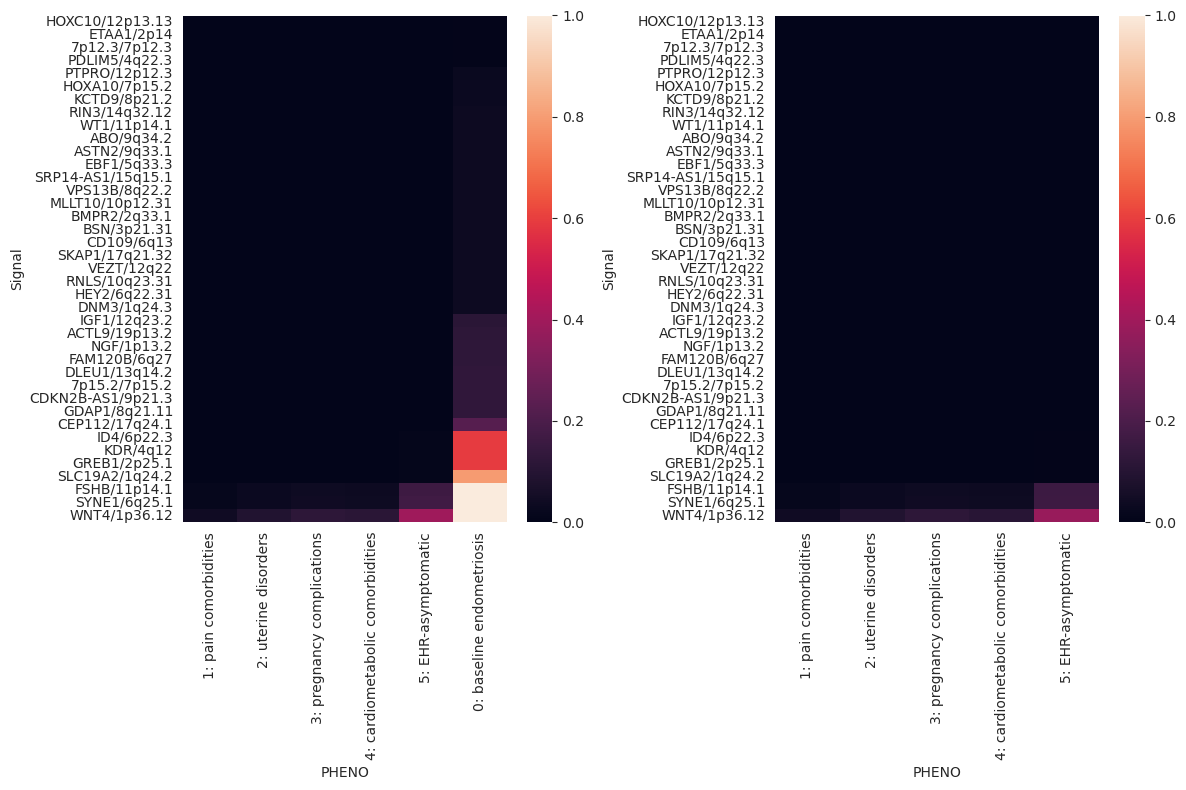

In [63]:
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(12, 8)

left_plot_df = df.sort_values(by=['Power', 'Signal'], ascending=False).drop_duplicates(subset=['Signal', 'PHENO'], keep='first').pivot_table(index='Signal', columns='PHENO', values='Power').sort_values(by='endometriosis')
left_plot_df = left_plot_df.rename(columns=pheno_map)

right_plot_df = df_nc.sort_values(by=['Power', 'Signal'], ascending=False).drop_duplicates(subset=['Signal', 'PHENO'], keep='first').pivot_table(index='Signal', columns='PHENO', values='Power')
right_plot_df = right_plot_df.rename(columns=pheno_map)
right_plot_df = right_plot_df.loc[left_plot_df.index]

sns.heatmap(left_plot_df, ax=axes[0], vmin=0, vmax=1)
sns.heatmap(right_plot_df, ax=axes[1], vmin=0, vmax=1)
plt.tight_layout()
plt.show()

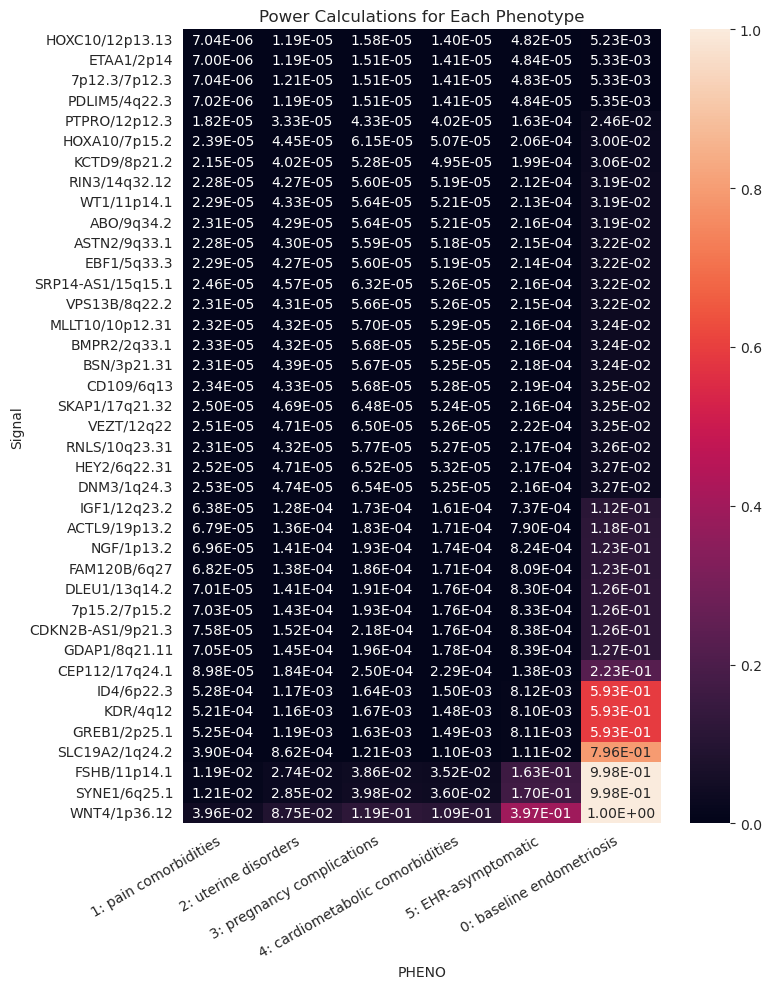

In [85]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 10)

left_plot_df = df.sort_values(by=['Power', 'Signal'], ascending=False).drop_duplicates(subset=['Signal', 'PHENO'], keep='first').pivot_table(index='Signal', columns='PHENO', values='Power').sort_values(by='endometriosis')
left_plot_df = left_plot_df.rename(columns=pheno_map)

sns.heatmap(left_plot_df, vmin=0, vmax=1, ax=ax, annot=True, fmt='.2E')
ax.set_title('Power Calculations for Each Phenotype')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.tight_layout()
os.makedirs('Plots', exist_ok=True)
plt.savefig('Plots/power_calculations_heatmap.png', bbox_inches='tight')
plt.show()

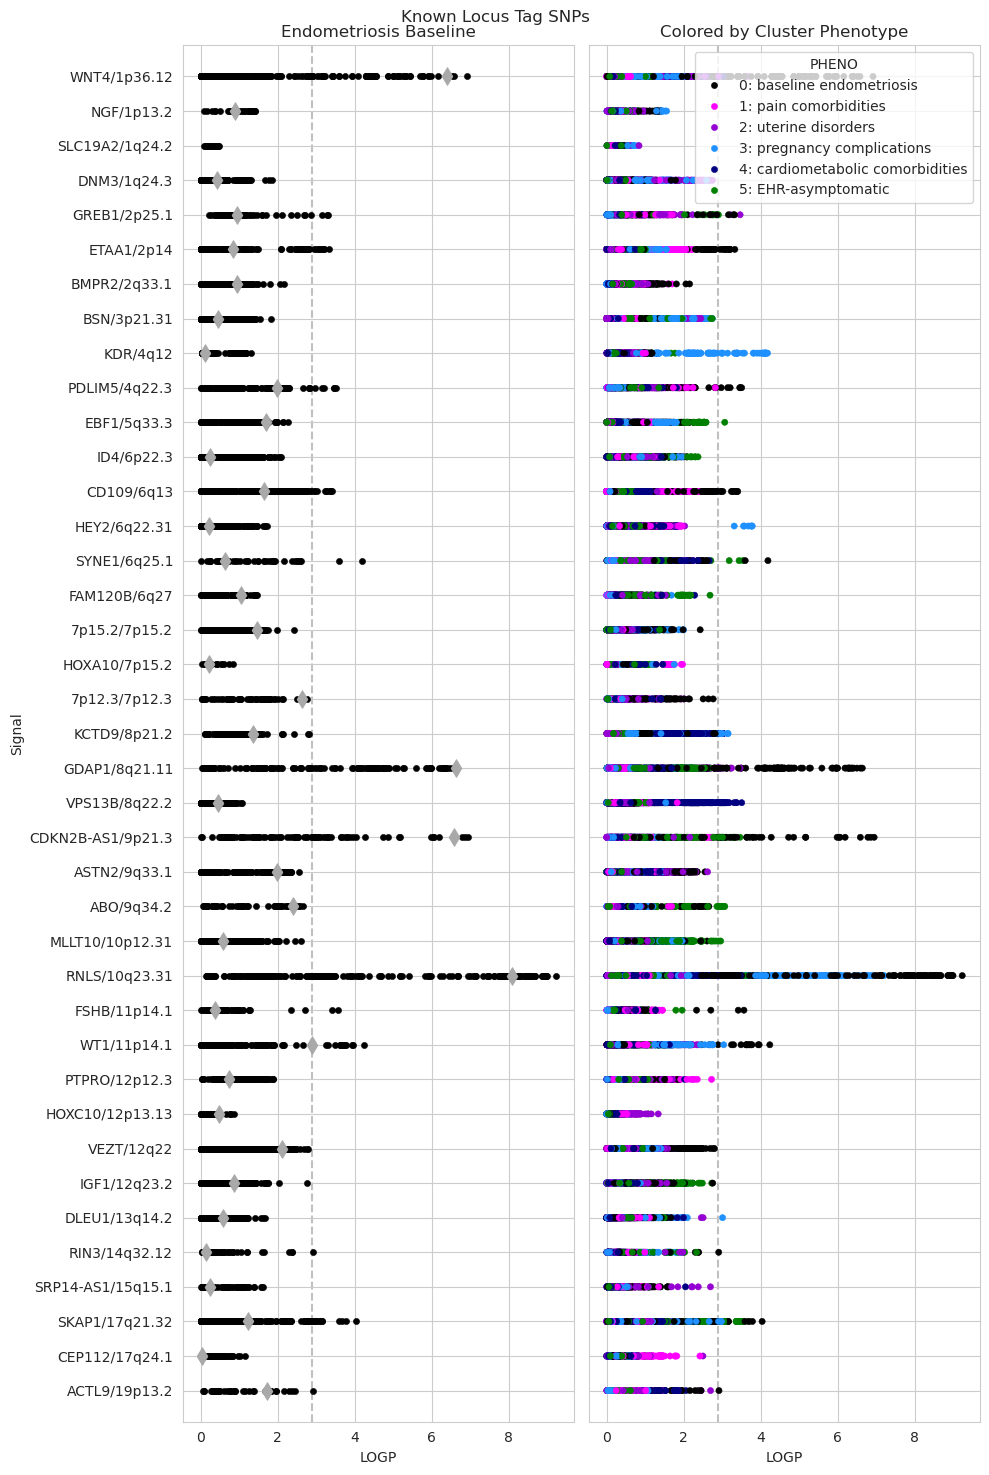

In [65]:
os.makedirs('Plots', exist_ok=True)

fig, axes = plt.subplots(ncols=2, sharey=True)

ax = axes[0]

fig.set_size_inches(10, 15)
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', color='k', edgecolor=None, s=20, legend=False, ax=ax)

# Lead SNPs
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, y='Signal', x='LOGP', color='darkgray', edgecolor=None, s=80, legend=False, marker='d', ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = ax.get_ylim()
plt.gca().set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Endometriosis Baseline')

os.makedirs('Plots', exist_ok=True)

ax = axes[1]
plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', hue='PHENO',
                palette=colors2, edgecolor=None, s=20, ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = plt.gca().get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Colored by Cluster Phenotype')
fig.suptitle('Known Locus Tag SNPs')
plt.tight_layout()
plt.savefig(f'Plots/{meta_group}_signal_manhattan_plot_{m_u}_two_panes.png', bbox_inches='tight')
plt.show()

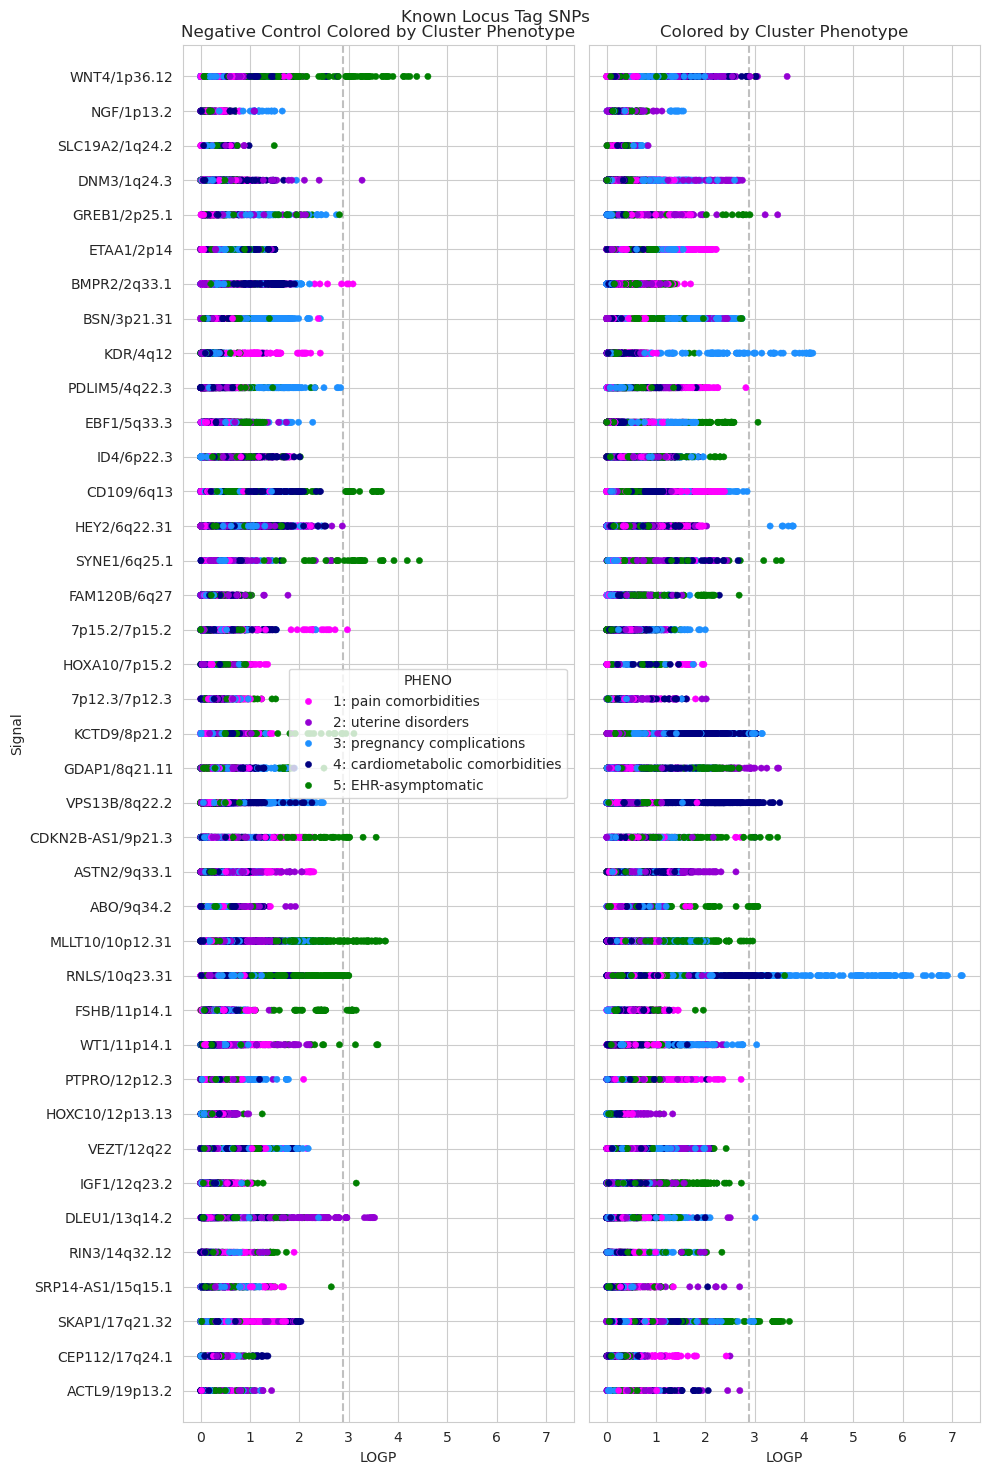

In [66]:
os.makedirs('Plots', exist_ok=True)

fig, axes = plt.subplots(ncols=2, sharey=True)

ax = axes[0]

fig.set_size_inches(10, 15)
plot_df = df_nc.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

os.makedirs('Plots', exist_ok=True)

ax = axes[0]
plot_df = df_nc.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', hue='PHENO',
                palette=colors, edgecolor=None, s=20, ax=ax)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = plt.gca().get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)

ax.set_title(f'Negative Control Colored by Cluster Phenotype')

ax = axes[1]
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] != 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
sns.scatterplot(data=plot_df, y='Signal', x='LOGP', hue='PHENO',
                palette=colors, edgecolor=None, s=20, ax=ax, legend=False)

ax.axvline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

top, bottom = plt.gca().get_ylim()
ax.set_ylim(top-0.5, bottom+0.5)
axes[0].set_xlim(axes[1].get_xlim())

ax.set_title(f'Colored by Cluster Phenotype')
fig.suptitle('Known Locus Tag SNPs')
plt.tight_layout()
plt.savefig(f'Plots/{meta_group}_NC_signal_manhattan_plot_{m_u}_two_panes.png', bbox_inches='tight')
plt.show()

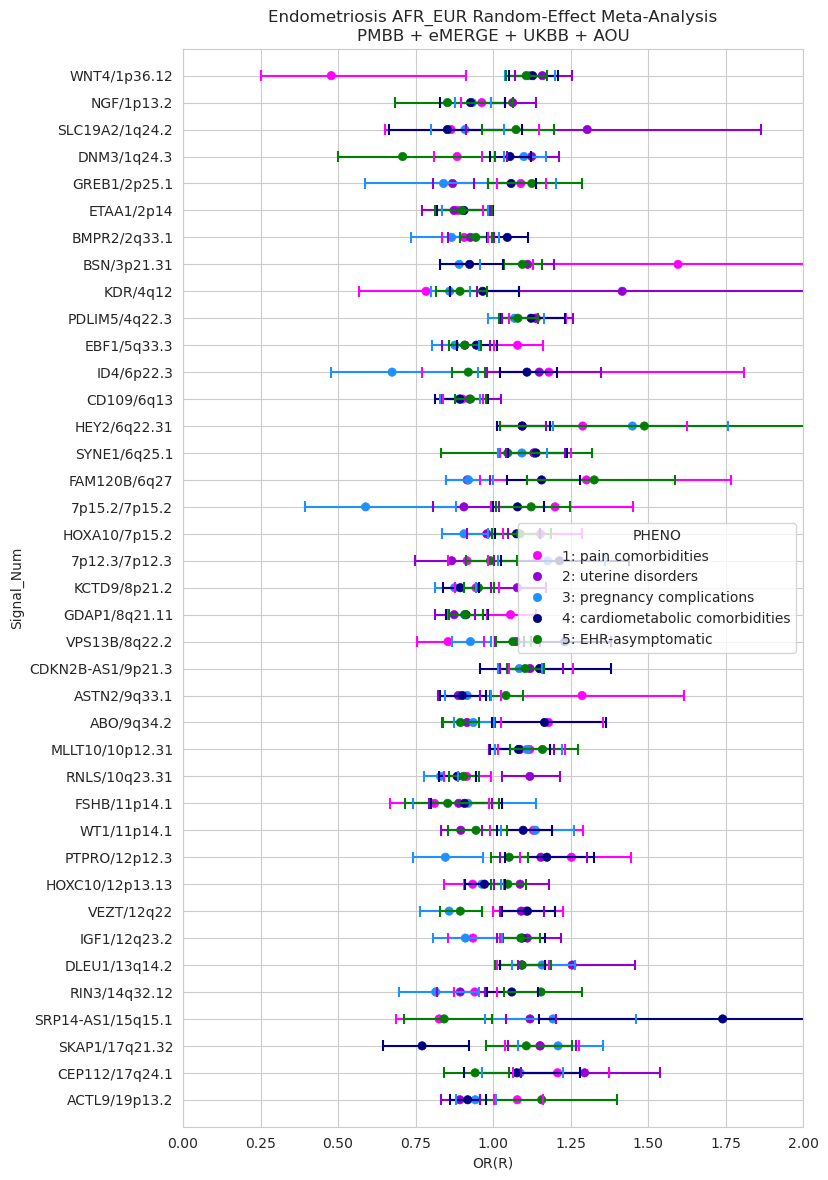

29433    G
29554    T
29543    G
29484    A
29515    A
Name: A1, dtype: object
28910    C
28996    G
27971    A
29202    G
28836    G
Name: A1, dtype: object
40757    T
40740    C
40627    T
40336    A
40707    C
Name: A1, dtype: object
58986    T
59155    T
59222    T
59175    C
58972    T
Name: A1, dtype: object
37741    G
40298    C
40251    G
39037    T
39605    A
Name: A1, dtype: object
6044    T
6411    G
5483    G
6053    C
6264    G
Name: A1, dtype: object
9121     A
9908     A
9261     G
9472     A
10679    C
Name: A1, dtype: object
20844    T
18956    C
18777    C
20715    C
19049    A
Name: A1, dtype: object
37496    C
37263    A
37168    A
37289    G
37266    A
Name: A1, dtype: object
58801    T
58616    C
58827    A
58232    T
58649    T
Name: A1, dtype: object
52338    C
52327    A
52357    A
53779    C
53366    A
Name: A1, dtype: object
3082    A
3400    G
3545    G
2707    T
2978    T
Name: A1, dtype: object
14550    T
13976    C
13816    C
13745    T
14470    C
Name: A

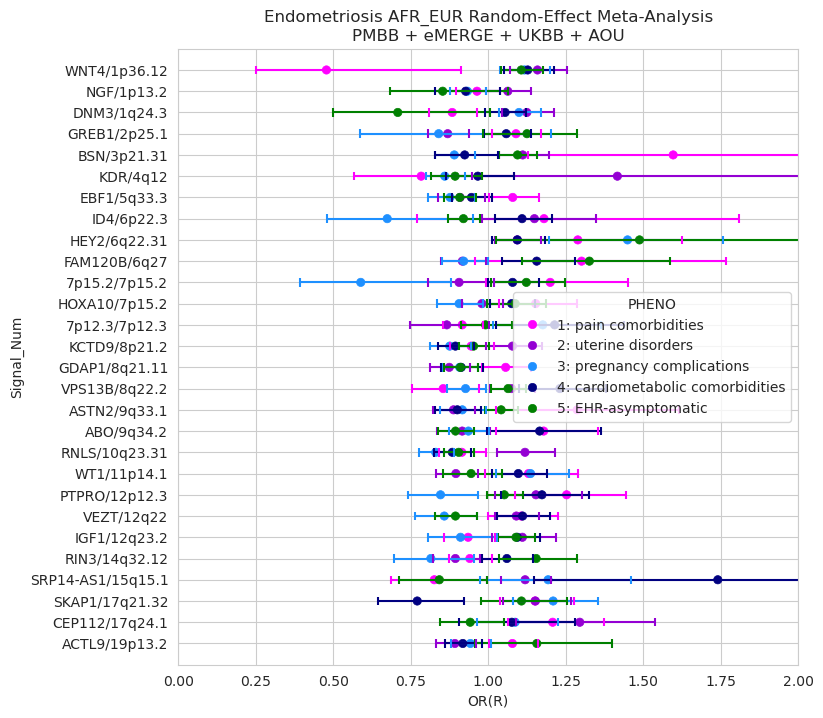

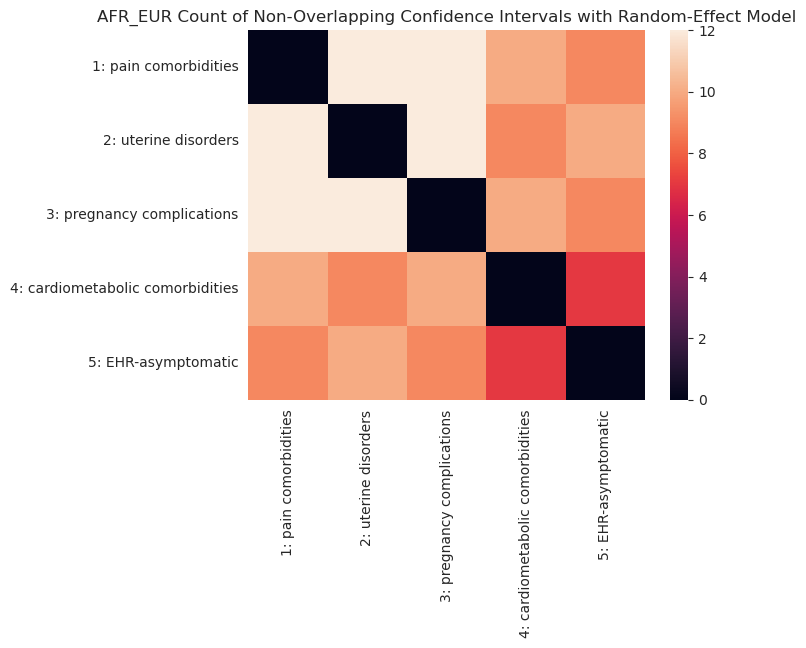

<Figure size 640x480 with 0 Axes>

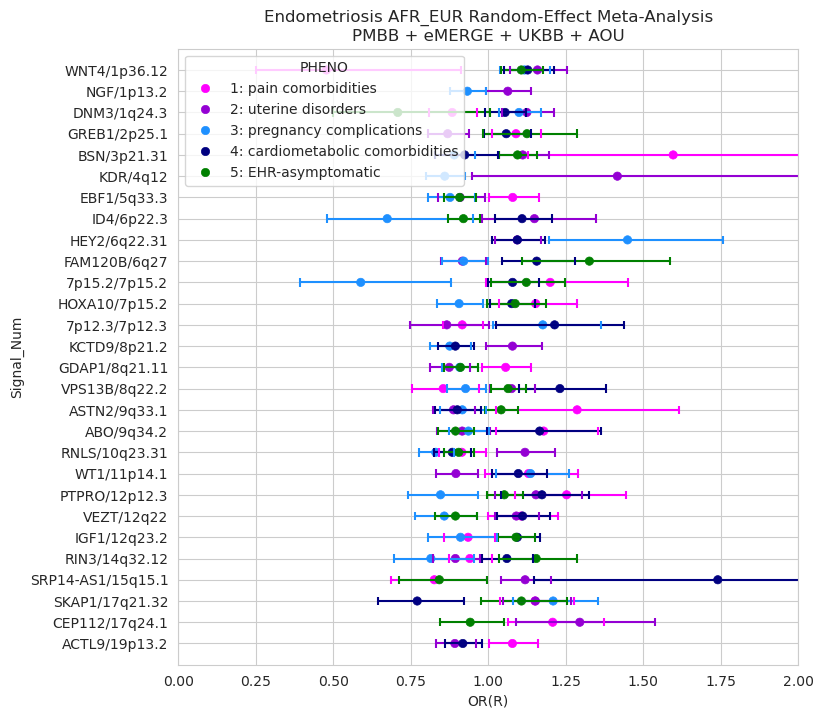

In [67]:
plot_df = df.copy()

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

# keep_snps = plot_df[plot_df['PHENO'] == 'endometriosis'].sort_values(by='P').drop_duplicates(subset=['Signal'], keep='first')['SNP'].unique()
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

# plot_df = plot_df[plot_df.set_index(['CHR', 'BP']).index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]

plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df[plot_df['PHENO'] != '0: baseline endometriosis']
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
use_cmap = new_cmap
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[use_cmap(pheno_i[p]) for p in plot_df['PHENO']])

use_colors = colors
sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=use_colors, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

plt.savefig(f'Plots/{meta_group}_{m_u}_endo_manhattan_T.png', bbox_inches='tight')
plt.show()

keep_dfs = []
keep_dfs_disjoint_only = []

all_differences = pd.DataFrame(data=0, index=plot_df['PHENO'].unique(), columns=plot_df['PHENO'].unique())

for signal, subDF in plot_df.groupby('Signal'):
    M = len(subDF)
    print(subDF['A1'])

    lower_2D_1 = np.broadcast_to(subDF['CI_OR_L'], (M,M))
    lower_2D_2 = np.broadcast_to(subDF['CI_OR_L'], (M,M)).T
    upper_2D_1 = np.broadcast_to(subDF['CI_OR_U'], (M,M))
    upper_2D_2 = np.broadcast_to(subDF['CI_OR_U'], (M,M)).T

    overlap = ((lower_2D_1 <= upper_2D_2) & (upper_2D_1 >= upper_2D_2)) | \
              ((lower_2D_1 <= upper_2D_1) & (upper_2D_1 >= upper_2D_1))

    disjoint = ((lower_2D_1 > upper_2D_2) & (upper_2D_1 > upper_2D_2)) | \
               ((lower_2D_1 < lower_2D_2) & (upper_2D_1 < lower_2D_2))

    disjoint = pd.DataFrame(disjoint | disjoint.T, index=subDF['PHENO'], columns=subDF['PHENO'])
    disjoint = disjoint.reindex_like(all_differences)
    all_differences += disjoint.fillna(0).astype(int)

    if np.any(disjoint):
        keep_phenos = disjoint.index
        keep_dfs.append(subDF[subDF['PHENO'].isin(keep_phenos)])

        keep_phenos_disjoint_only = disjoint.index[disjoint.apply(lambda x: np.any(x), axis=1)]
        keep_dfs_disjoint_only.append(subDF[subDF['PHENO'].isin(keep_phenos_disjoint_only)])

plot_df = pd.concat(keep_dfs)
plot_df_disjoint_only = pd.concat(keep_dfs_disjoint_only)

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

colors3 = [colors2[i] for i in range(len(colors2)) if sorted(list(pheno_map.values()))[i] in plot_df['PHENO'].unique()]
new_cmap3 = mpl.colors.ListedColormap(colors3)

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])


sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_{m_u}_disjoint_endo_manhattan_T.png', bbox_inches='tight')
plt.show()
plt.clf()

sns.heatmap(all_differences.sort_index().sort_index(axis=1))
plt.title(f'{meta_group} Count of Non-Overlapping Confidence Intervals with {model_used} Model')
plt.savefig(f'Plots/{meta_group}_{m_u}_pheno_diff_heatmap.png', bbox_inches='tight')
plt.show()
plt.clf()

fig, ax = plt.subplots()
fig.set_size_inches(8, 8)

plot_df = plot_df_disjoint_only.sort_values(by=['CHR', 'BP'], ascending=False)
signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

colors3 = [colors2[i] for i in range(len(colors2)) if sorted(list(pheno_map.values()))[i] in plot_df['PHENO'].unique()]
new_cmap3 = mpl.colors.ListedColormap(colors3)

tick_width = 0.2
ax.hlines(plot_df['Signal_Num'], plot_df['CI_OR_L'], plot_df['CI_OR_U'], colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_L'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])
ax.vlines(plot_df['CI_OR_U'], plot_df['Signal_Num'] - tick_width, plot_df['Signal_Num'] + tick_width, colors=[new_cmap3(pheno_i[p]) for p in plot_df['PHENO']])


sns.scatterplot(data=plot_df, y='Signal_Num', x=or_col, hue='PHENO',
                palette=colors3, edgecolor=None, ax=ax)

rahm_or = rahmioglu.reset_index().set_index('Signal')['Overall_OR']
rahm_or = rahm_or[rahm_or.index.isin(signal_num)]
rahm_or = rahm_or.rename(index=signal_num)
# ax.vlines(rahm_or, rahm_or.index - 0.4, rahm_or.index + 0.4, color='silver', linewidth=3)

ax.set_yticks(list(signal_num.values()))
ax.set_yticklabels(list(signal_num.keys()))
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB + AOU')
ax.set_ylim(-1, max(signal_num.values()) + 1)
ax.set_xlim(0, 2)

# plt.axvline(1, c='k', zorder=-10, linewidth=3)

plt.savefig(f'Plots/{meta_group}_{m_u}_disjoint_endo_manhattan_T_disjoint_only.png', bbox_inches='tight')
plt.show()

PHENO       0: baseline endometriosis  1: pain comorbidities  \
Signal_Num                                                     
0                            2.916497               1.361910   
1                            1.162096               2.421590   
2                            4.038342               2.135074   
3                            0.968592               1.350179   
4                            2.909742               0.990549   
5                            0.299469               1.674074   
6                            1.053597               0.861382   
7                            2.329754               1.276544   
8                            0.870310               0.710188   
9                            1.891097               2.723998   
10                           4.237396               1.164500   
11                           0.954677               1.438422   
12                           9.237471               1.444060   
13                           1.911155   

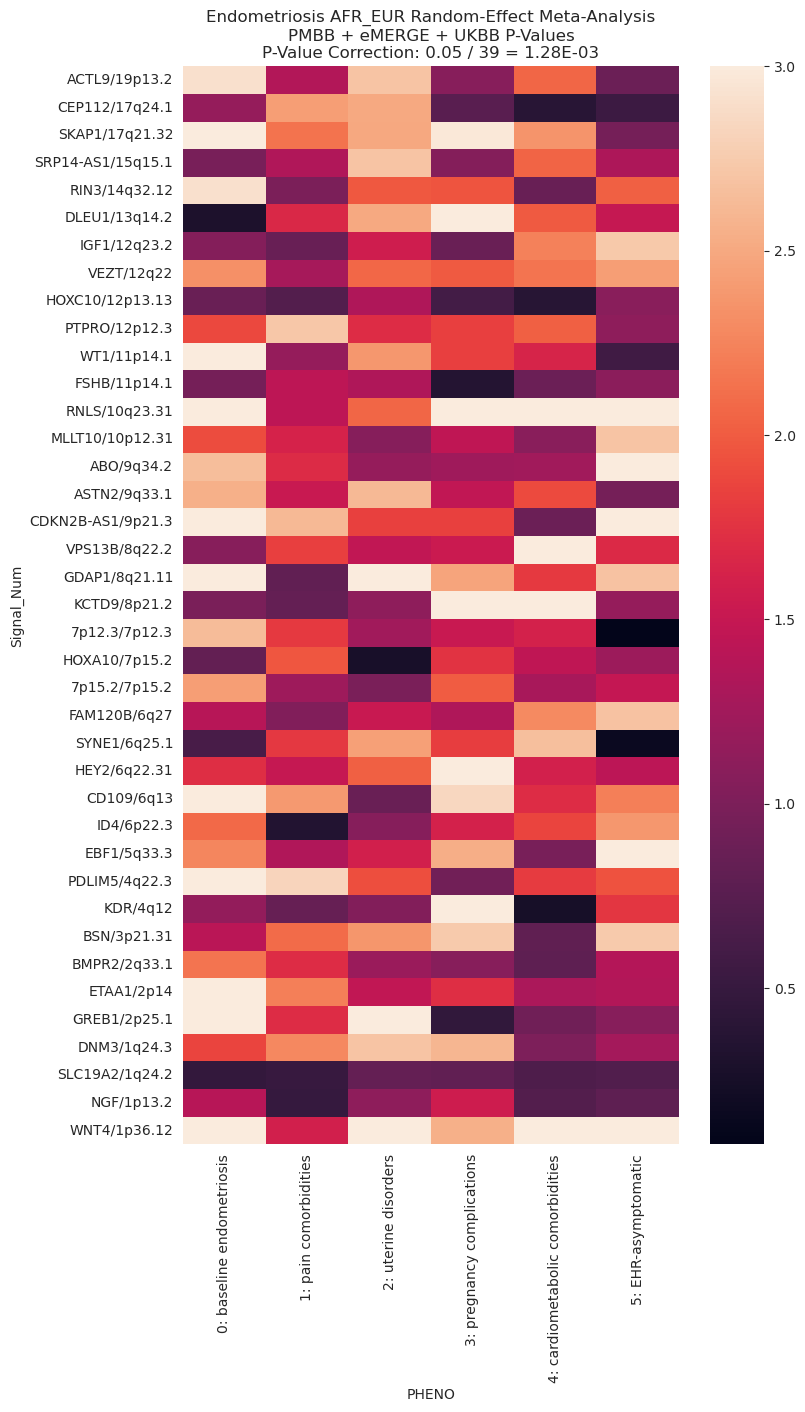

In [68]:
plot_df = df.copy()

p_thresh = 0.05 / len(rahmioglu)
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

# keep_snps = plot_df[plot_df['PHENO'] == 'endometriosis'].sort_values(by='P').drop_duplicates(subset=['Signal'], keep='first')['SNP'].unique()
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]
# plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['PHENO', 'Signal'], keep='first')

plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
# plot_df = plot_df[plot_df['PHENO'] != '0: baseline endometriosis']
plot_df = plot_df.sort_values(by=['CHR', 'BP'], ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8, 14)

signal_num = dict(zip(plot_df['Signal'].unique(), np.arange(len(plot_df['Signal'].unique()))))
plot_df['Signal_Num'] = [signal_num[s] for s in plot_df['Signal']]

plot_df = plot_df.sort_values(by='PHENO')
pheno_i = dict(zip(plot_df['PHENO'].unique(), np.arange(6)))

tick_width = 0.2
use_cmap = new_cmap

use_colors = colors

plot_df = plot_df.pivot(index='Signal_Num', columns='PHENO', values='LOGP')
print(plot_df)


sns.heatmap(plot_df, vmax=3)

ax.set_yticks([v + 0.5 for v in list(signal_num.values())])
ax.set_yticklabels(list(signal_num.keys()), rotation=0)
p_thresh = 0.05 / len(rahmioglu)
ax.set_title(f'Endometriosis {meta_group} {model_used} Meta-Analysis\nPMBB + eMERGE + UKBB P-Values\nP-Value Correction: 0.05 / {len(rahmioglu)} = {p_thresh:.2E}')


print((plot_df > -np.log10(p_thresh)).apply(lambda x: x.value_counts(), result_type='expand').transpose())

plt.savefig(f'Plots/{meta_group}_{m_u}_endo_logp_heatmap.png', bbox_inches='tight')
plt.show()

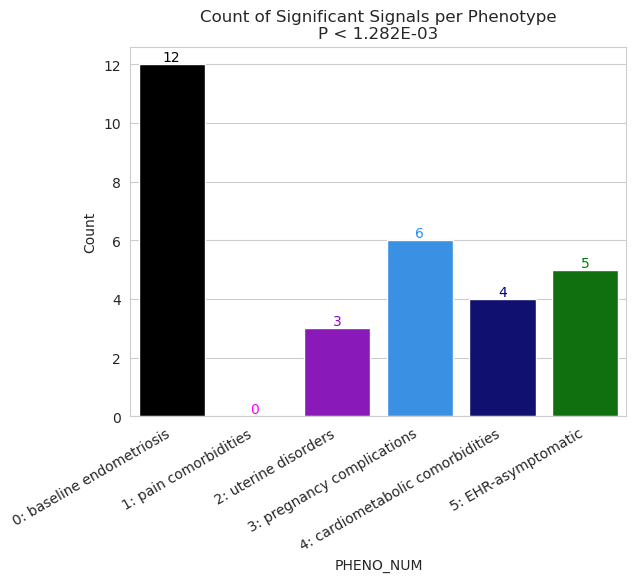

In [69]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    ax.text(pheno_num[pheno], count1, f'{count1}',
            color=colors2[pheno_num[pheno]], ha='center', va='bottom')

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count of Significant Signals per Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')

plt.savefig(f'Plots/{meta_group}_{m_u}_sig_signal_counts.png', bbox_inches='tight')
plt.show()

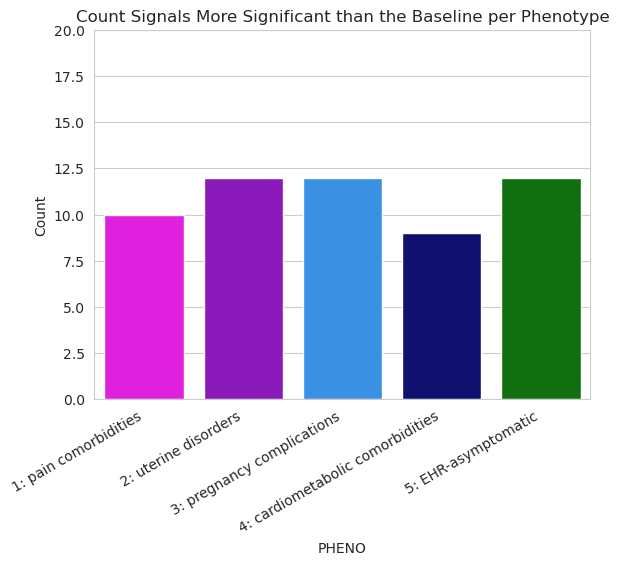

In [70]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col)
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'Count Signals More Significant than the Baseline per Phenotype')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 20)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')

plt.savefig(f'Plots/{meta_group}_{m_u}_beat_positive_control_counts.png', bbox_inches='tight')
plt.show()

                  Signal          P(R)
43630      RNLS/10q23.31  5.788000e-10
37525  CDKN2B-AS1/9p21.3  1.126000e-07
31290      GDAP1/8q21.11  2.283000e-07
1133        WNT4/1p36.12  1.658000e-06
45407        WT1/11p14.1  5.789000e-05
55755     SKAP1/17q21.32  9.155000e-05
20969         CD109/6q13  3.947000e-04
4646          ETAA1/2p14  4.696000e-04
12537      PDLIM5/4q22.3  6.212000e-04
3944        GREB1/2p25.1  6.853000e-04
59219      ACTL9/19p13.2  1.212000e-03
54224      RIN3/14q32.12  1.231000e-03
40702         ABO/9q34.2  2.216000e-03
29456      7p12.3/7p12.3  2.267000e-03
39960       ASTN2/9q33.1  2.802000e-03
29198      7p15.2/7p15.2  3.732000e-03
49168         VEZT/12q22  4.680000e-03
13795        EBF1/5q33.3  5.517000e-03
6247        BMPR2/2q33.1  7.039000e-03
17734         ID4/6p22.3  8.357000e-03
40996    MLLT10/10p12.31  1.227000e-02
47014      PTPRO/12p12.3  1.285000e-02
3542         DNM3/1q24.3  1.371000e-02
23997       HEY2/6q22.31  1.924000e-02
9978         BSN/3p21.31 

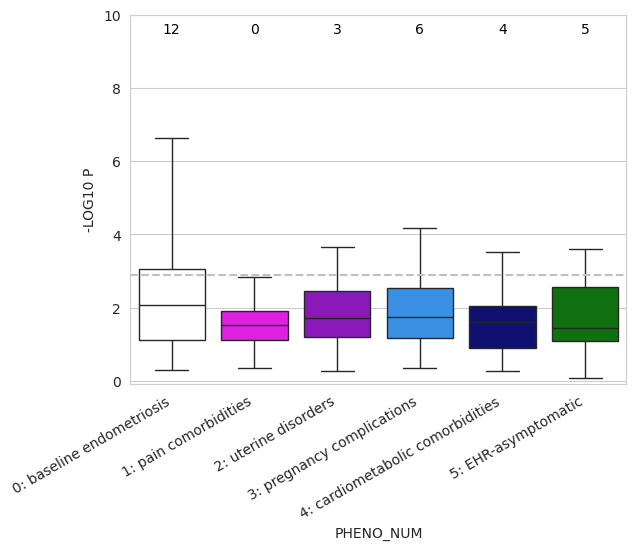

In [71]:
plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by='P').drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, ax = plt.subplots()

bp = sns.boxplot(data=plot_df, x='PHENO_NUM', y='LOGP', hue='PHENO',
                 palette=colors4, dodge=False,
                 legend=False, ax=ax, showfliers=False,
                 whis=2)

ax.axhline(-np.log10(p_thresh), color='silver', linestyle='dashed')
# ax.axhline(-np.log10(0.05), color='springgreen', linestyle='dashed')
ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')

ax.set_ylabel('-LOG10 P')

ax.set_ylim(-0.1, 10)

for pheno, subDF in plot_df.groupby('PHENO'):
    print(subDF[['Signal', p_col]].sort_values(by=p_col))
    count1 = (subDF[p_col] < p_thresh).sum()
    count2 = (subDF[p_col] < 0.05).sum()
    ax.text(pheno_num[pheno], 9.5, f'{count1}', color='k', ha='center')
    # ax.text(pheno_num[pheno], 4.6, f'{count2}', color='springgreen', ha='center')

plt.savefig(f'Plots/{meta_group}_{m_u}_log_p_box_plot.png', bbox_inches='tight')
plt.show()

(-4.0, 40.0)


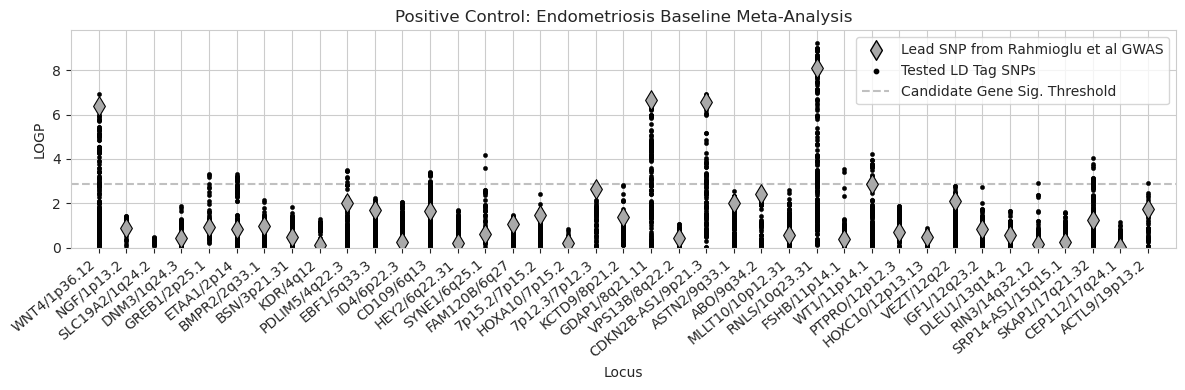

'WNT4/1p36.12 (P = 1.20E-07, rs2235529:T), GREB1/2p25.1 (P = 4.78E-04, rs12476319:C), ETAA1/2p14 (P = 4.70E-04, rs4349334:T), PDLIM5/4q22.3 (P = 3.12E-04, rs7681843:A), CD109/6q13 (P = 3.95E-04, rs4554292:A), SYNE1/6q25.1 (P = 6.47E-05, rs13218956:T), GDAP1/8q21.11 (P = 2.28E-07, rs10090060:G), CDKN2B-AS1/9p21.3 (P = 1.13E-07, rs10811669:C), RNLS/10q23.31 (P = 5.79E-10, rs4934404:T), FSHB/11p14.1 (P = 2.72E-04, rs7951733:G), WT1/11p14.1 (P = 5.79E-05, rs2207548:A), RIN3/14q32.12 (P = 1.23E-03, rs75772533:T), SKAP1/17q21.32 (P = 9.16E-05, rs4794447:C), ACTL9/19p13.2 (P = 1.21E-03, rs35276077:T)'

In [72]:
fig, ax = plt.subplots()

fig.set_size_inches(12, 4)
plot_df = df.copy()
plot_df = plot_df[plot_df['PHENO'] == 'endometriosis']
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
sns.scatterplot(data=plot_df, x='Signal', y='LOGP', color='k', edgecolor=None, s=10, legend=False, ax=ax)

# Lead SNPs
plot_df2 = df.set_index(['CHR', 'BP'])
plot_df2 = plot_df2.loc[plot_df2.index.isin(rahmioglu.reset_index().set_index(['Chr', 'Position (b38)']).index)]
plot_df2 = plot_df2[plot_df2['PHENO'] == 'endometriosis']
sns.scatterplot(data=plot_df2, x='Signal', y='LOGP', color='darkgray', edgecolor='k', s=100, legend=False, marker='d', ax=ax)

ax.axhline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

ax.scatter(-2, -2, color='darkgray', edgecolor='k', s=100, marker='d', label='Lead SNP from Rahmioglu et al GWAS')
ax.scatter(-2, -2, color='k', s=10, label='Tested LD Tag SNPs')
ax.axhline(-2, color='silver', linestyle='dashed', label='Candidate Gene Sig. Threshold')
ax.legend()

ax.set_title(f'Positive Control: Endometriosis Baseline Meta-Analysis')
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylim(bottom=0)
print(ax.get_xlim())
ax.set_xlim(-1, 39)

ax.tick_params(axis='both', which='major', left=True, bottom=True)
ax.set_xlabel('Locus')

plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_5_{meta_group}_positive_control_manhattan_plot.png', bbox_inches='tight')
plt.show()

', '.join(plot_df[plot_df[p_col] < sig_line].sort_values(by=p_col).drop_duplicates('Signal').sort_values(by=['CHR', 'POS']).apply(lambda x: f'{x["Signal"]} (P = {x[p_col]:.2E}, {x["RSID"]}:{x["A1"]})', axis=1))

(-4.0, 40.0)
(-1.9000000000000001, 39.9)


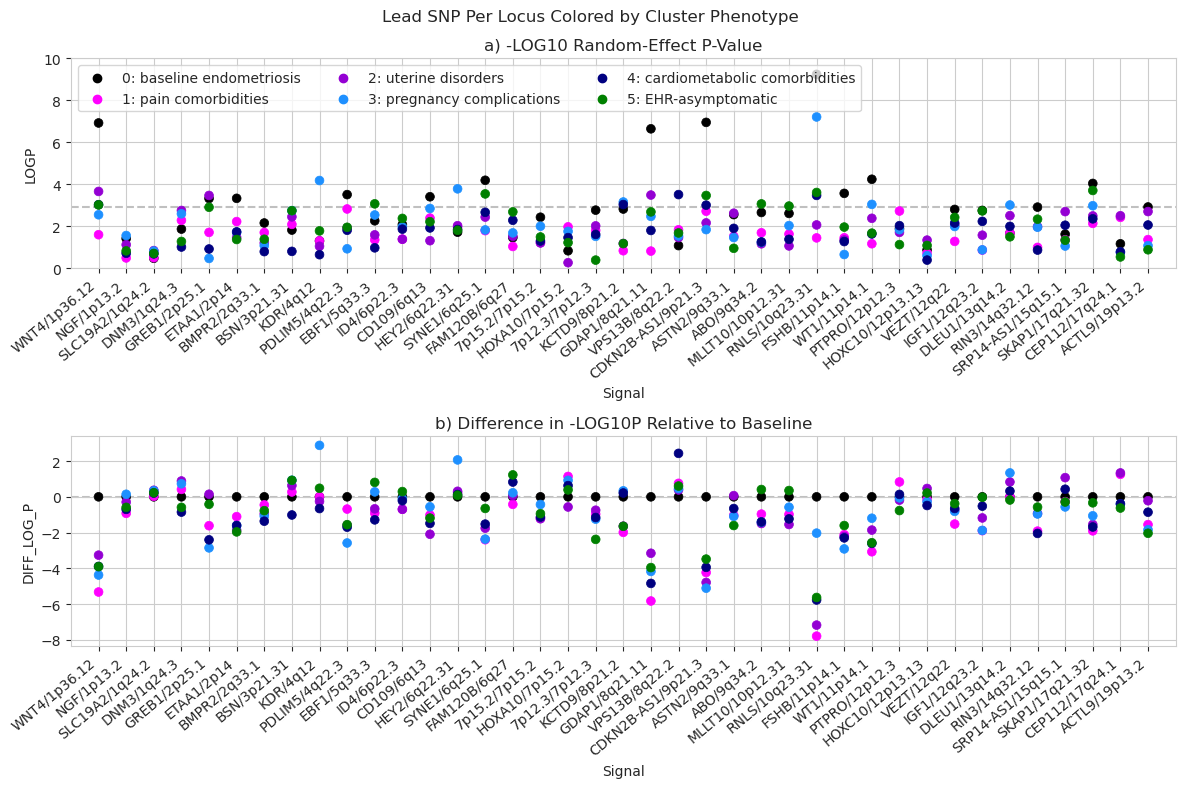

In [73]:
fig, axes = plt.subplots(nrows=2)
fig.set_size_inches(12, 8)
ax = axes[0]


plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['PHENO', 'Signal'])
plot_df = plot_df.sort_values(by=['PHENO', 'CHR', 'BP'])
sns.scatterplot(data=plot_df, x='Signal', y='LOGP', hue='PHENO',
                palette=colors2, edgecolor=None, s=40, ax=ax, legend=False)

for i, pheno in enumerate(plot_df['PHENO'].unique()):
    ax.scatter(-2, -2, label=pheno, color=colors2[i])

ax.legend(ncols=3, loc='upper left')

ax.axhline(-np.log10(sig_line), c='silver', linestyle='dashed', zorder=-10)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set_ylim(bottom=0, top=10)
print(ax.get_xlim())
ax.set_xlim(-1, 39)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

ax.set_title(f'a) -LOG10 Random-Effect P-Value')

ax = axes[1]
plot_df = df.copy()
if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

# All SNPs
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['PHENO', 'Signal'])

subtrahend = plot_df[plot_df['PHENO'] == '0: baseline endometriosis'].set_index('Signal').loc[plot_df['Signal'], 'LOGP'].values
plot_df['DIFF_LOG_P'] = plot_df['LOGP'] - subtrahend

plot_df = plot_df.sort_values(by=['PHENO', 'CHR', 'BP'])
sns.scatterplot(data=plot_df, x='Signal', y='DIFF_LOG_P', hue='PHENO',
                palette=colors2, edgecolor=None, s=40, ax=ax, legend=False)

ax.axhline(0, c='silver', linestyle='dashed', zorder=-10)

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
# ax.set_ylim(0, 7)
print(ax.get_xlim())
ax.set_xlim(-1, 39)


for i, pheno in enumerate(plot_df['PHENO'].unique()):
    ax.scatter(-2, -2, label=pheno, color=colors2[i])

# ax.legend(ncols=3)

ax.tick_params(axis='both', which='major', left=True, bottom=True)

ax.set_title(f'b) Difference in -LOG10P Relative to Baseline')
plt.suptitle(f'Lead SNP Per Locus Colored by Cluster Phenotype')


plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_6_{meta_group}_cluster_p_value_plot.png', bbox_inches='tight')
plt.show()

PHENO            0: baseline endometriosis  1: pain comorbidities  \
NGF/1p13.2                           False                  False   
GREB1/2p25.1                         False                  False   
ID4/6p22.3                           False                  False   
ASTN2/9q33.1                         False                  False   
ABO/9q34.2                           False                  False   
MLLT10/10p12.31                      False                  False   

PHENO            2: uterine disorders  3: pregnancy complications  \
NGF/1p13.2                      False                        True   
GREB1/2p25.1                     True                       False   
ID4/6p22.3                      False                       False   
ASTN2/9q33.1                     True                       False   
ABO/9q34.2                      False                       False   
MLLT10/10p12.31                 False                       False   

PHENO            4: cardiometabo

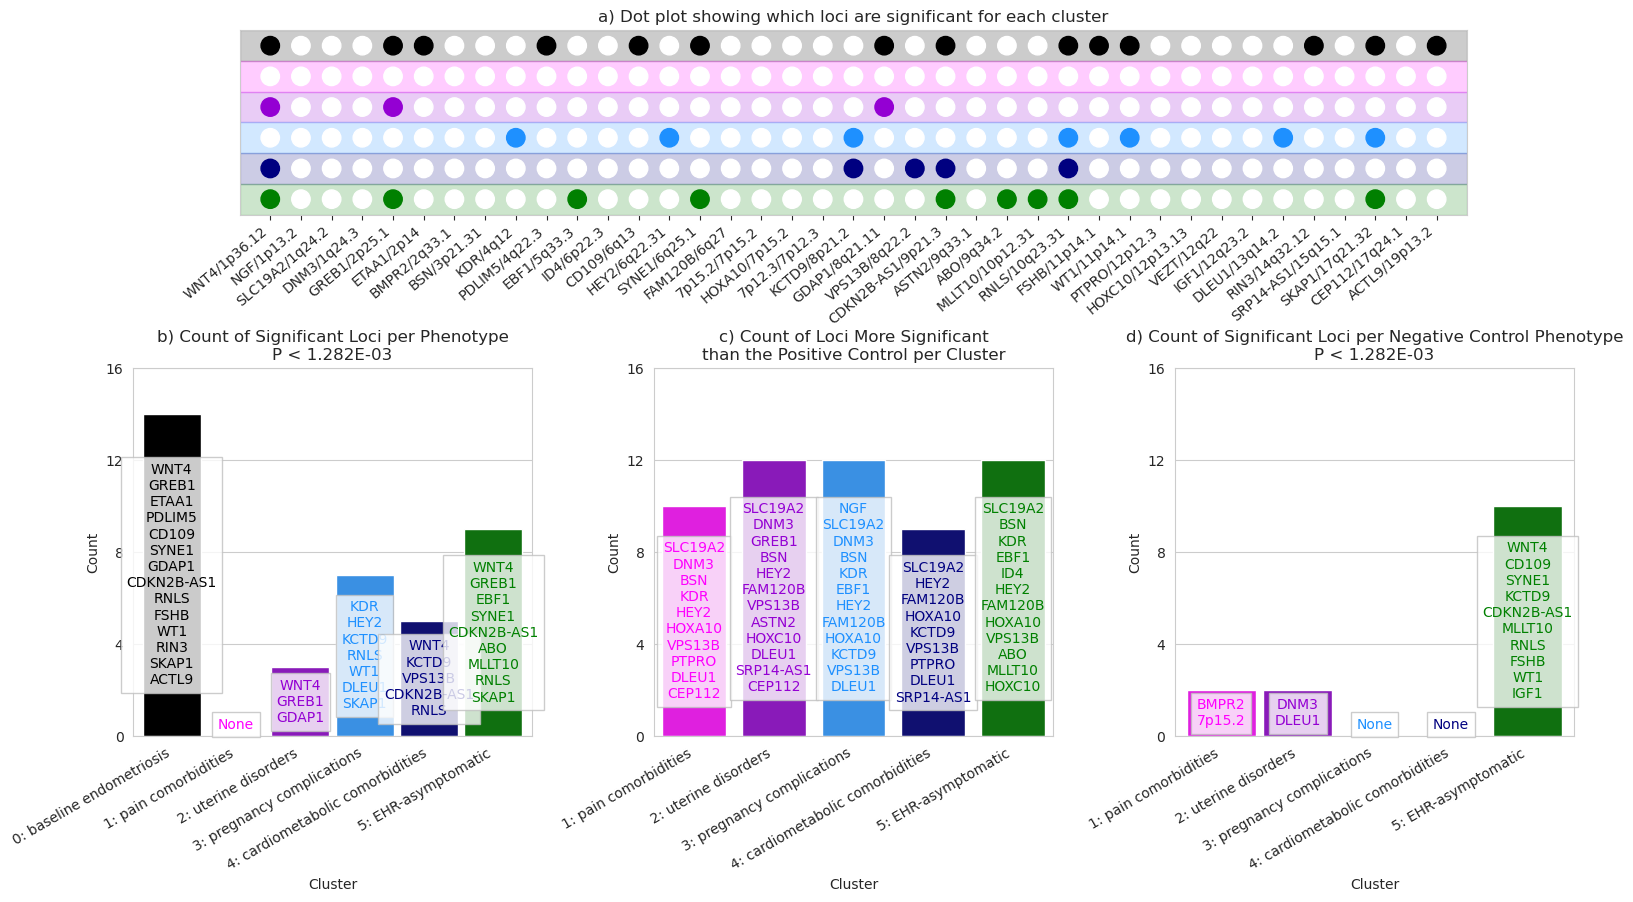

In [74]:
plot_df = df.copy()

p_thresh = sig_line

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

signal_order = pd.Series(signal_num).sort_values(ascending=False).index

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col).loc[signal_order]
p_val_pivot = plot_df.copy()
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

print(plot_df[plot_df.sum(axis=1) == 1])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, axes = plt.subplots(ncols=3, gridspec_kw={'width_ratios': [1, 1, 1], 'height_ratios': [0.5, 1]}, nrows=2)
fig.set_size_inches(16, 9)

ax = axes[1][1]

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()
sig_counts['PHENO_NUM'] = sig_counts['PHENO'].replace(pheno_num)

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

for _, row in sig_counts.iterrows():
    pheno = row['PHENO']
    count1 = row['Beats_Pos_Control']

    sig_signals = plot_df.index[plot_df[pheno]]
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno] - 1, max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sns.barplot(data=sig_counts, x='PHENO_NUM', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'c) Count of Loci More Significant\nthan the Positive Control per Cluster')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 16)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')
ax.set_yticks(np.arange(0, 17, 4))
ax.set_xlabel('Cluster')


plot_df = df.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

ax = axes[1][0]
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    sig_signals = subDF[subDF[p_col] < p_thresh].sort_values(by=['CHR', 'BP'])['Signal']
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno], max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=1,
            ax=ax, legend=False, width=0.9)

ax.set_ylim(0, 16)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'b) Count of Significant Loci per Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')
print(ax.get_xlim())
ax.set_xlim(-0.6, 5.6)

ax.set_xticks(np.arange(len(pheno_num)))
ax.set_xticklabels(pheno_num.keys(), rotation=30, ha='right')
ax.set_xlabel('Cluster')

ax.set_yticks(np.arange(0, 17, 4))


plot_df = df_nc.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

ax = axes[1][2]
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    sig_signals = subDF[subDF[p_col] < p_thresh].sort_values(by=['CHR', 'BP'])['Signal']
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno]-1, max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False, width=0.9)

ax.set_ylim(0, 16)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'd) Count of Significant Loci per Negative Control Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')
print(ax.get_xlim())
ax.set_xlim(-0.6, 4.6)

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')
ax.set_xlabel('Cluster')

ax.set_yticks(np.arange(0, 17, 4))

gs = axes[0][0].get_gridspec()
axes[0][0].remove()
axes[0][1].remove()
axes[0][2].remove()
upset_ax = fig.add_subplot(gs[0, :])

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

sig_counts = sig_counts.set_index('PHENO_NUM')
for pheno, i in pheno_num.items():
    new_rect = Rectangle(xy=(0, 5-i), width=len(signal_num)+1, height=1, color=colors2[i], alpha=0.2)
    upset_ax.add_patch(new_rect)
    for signal, j in signal_num.items():
        use_color = 'w' if p_val_pivot.loc[signal, pheno] > sig_line else colors2[i]
        new_circle = Circle(xy=(39-j, (5-i)+0.5), radius=0.3, color=use_color)
        upset_ax.add_patch(new_circle)


upset_ax.set_ylim(0, 6)
upset_ax.set_xlim(0, len(signal_num)+1)
upset_ax.set_aspect('equal')
upset_ax.grid(False)

# upset_ax.set_yticks(np.arange(0.5, 6, 1))
# upset_ax.set_yticklabels(reversed(sorted(list(pheno_num.keys()))))
upset_ax.set_yticks([])

upset_ax.set_xticks(np.arange(1, 40, 1))
upset_ax.set_xticklabels(signal_order, rotation=40, ha='right')
upset_ax.tick_params(axis='both', which='major', left=True, bottom=True)

upset_ax.set_title('a) Dot plot showing which loci are significant for each cluster')

plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_6_NEW_{meta_group}_multi_pane_upset_plus_bar.png', bbox_inches='tight')
plt.show()

PHENO            0: baseline endometriosis  1: pain comorbidities  \
NGF/1p13.2                           False                  False   
EBF1/5q33.3                          False                  False   
CD109/6q13                           False                  False   
SYNE1/6q25.1                         False                  False   
FAM120B/6q27                         False                  False   
7p15.2/7p15.2                        False                   True   
KCTD9/8p21.2                         False                  False   
MLLT10/10p12.31                      False                  False   
PTPRO/12p12.3                        False                   True   
IGF1/12q23.2                         False                  False   
CEP112/17q24.1                       False                  False   

PHENO            2: uterine disorders  3: pregnancy complications  \
NGF/1p13.2                      False                        True   
EBF1/5q33.3                     F

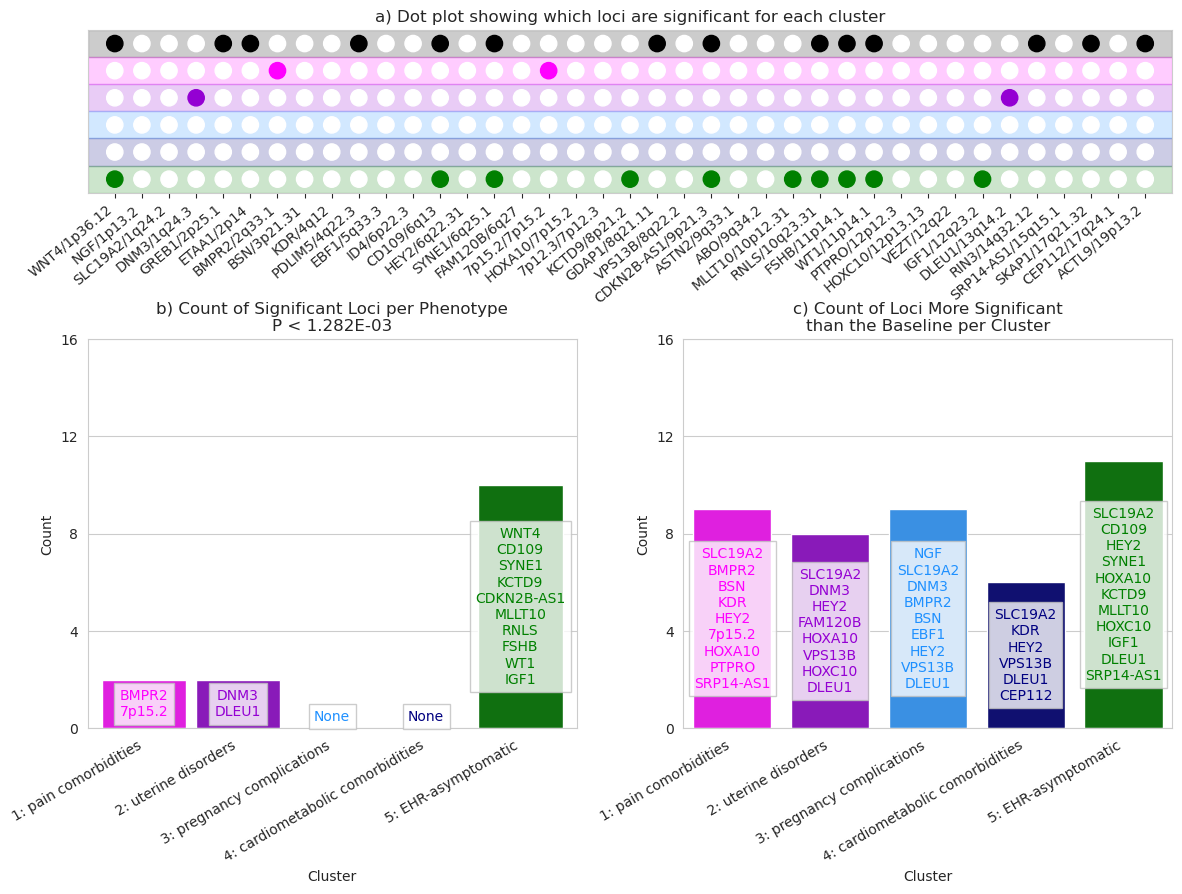

In [75]:
plot_df = pd.concat([df_nc, df[df['PHENO'] == 'endometriosis']])

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]

signal_order = pd.Series(signal_num).sort_values(ascending=False).index

# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)
plot_df = plot_df.pivot_table(columns='PHENO', index='Signal', values=p_col).loc[signal_order]
p_val_pivot = plot_df.copy()
plot_df = plot_df.apply(lambda x: x < plot_df['0: baseline endometriosis'])

print(plot_df[plot_df.sum(axis=1) == 1])

colors4 = [c if c != 'k' else 'w' for c in colors2]

fig, axes = plt.subplots(ncols=2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios': [0.5, 1]}, nrows=2)
fig.set_size_inches(12, 9)

ax = axes[1][1]

sig_counts = pd.DataFrame(index=plot_df.columns, columns=['Beats_Pos_Control'])

sig_counts.index.name = 'PHENO'
sig_counts['Beats_Pos_Control'] = plot_df.sum()
sig_counts = sig_counts.drop('0: baseline endometriosis')
sig_counts = sig_counts.reset_index()
sig_counts['PHENO_NUM'] = sig_counts['PHENO'].replace(pheno_num)

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

for _, row in sig_counts.iterrows():
    pheno = row['PHENO']
    count1 = row['Beats_Pos_Control']

    sig_signals = plot_df.index[plot_df[pheno]]
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno] - 1, max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sns.barplot(data=sig_counts, x='PHENO_NUM', y='Beats_Pos_Control',
            hue='PHENO', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False)

# ax.set_ylim(0, 35)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'c) Count of Loci More Significant\nthan the Baseline per Cluster')
ax.set_ylabel('Count')

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_ylim(0, 16)
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')
ax.set_yticks(np.arange(0, 17, 4))
ax.set_xlabel('Cluster')


plot_df = df_nc.copy()

p_thresh = sig_line
# p_thresh = 0.05

if meta_group in ['EUR', 'AFR']:
    plot_df = plot_df[plot_df['I'] <= 75]


# snp_counts = plot_df['SNP'].value_counts().sort_values(ascending=False).to_frame()
# snp_counts['Signal'] = plot_df.drop_duplicates(subset=['Signal', 'SNP'])[['Signal', 'SNP']].set_index('SNP').loc[snp_counts.index]
# snp_counts = snp_counts.drop_duplicates(subset='Signal')
# keep_snps = snp_counts.index
# plot_df = plot_df[plot_df['SNP'].isin(keep_snps)]

ax = axes[1][0]
plot_df = plot_df.sort_values(by=p_col).drop_duplicates(subset=['Signal', 'PHENO'], keep='first')
plot_df['PHENO'] = plot_df['PHENO'].replace(pheno_map)

pheno_num = dict(zip(sorted(pheno_map.values()), np.arange(len(pheno_map.keys()))))
plot_df['PHENO_NUM'] = plot_df['PHENO'].replace(pheno_num)

colors4 = [c if c != 'k' else 'w' for c in colors2]

sig_counts = pd.DataFrame(columns=['0.05', 'BF-Corrected'])
for pheno, subDF in plot_df.groupby('PHENO'):
    count1 = (subDF[p_col] < p_thresh).astype(int).sum()
    sig_counts.loc[pheno_num[pheno], 'BF-Corrected'] = count1
    count2 = (subDF[p_col] < 0.05).sum()
    sig_counts.loc[pheno_num[pheno], '0.05'] = count2
    sig_signals = subDF[subDF[p_col] < p_thresh].sort_values(by=['CHR', 'BP'])['Signal']
    sig_signals = [s.split('/')[0] for s in sig_signals]
    # t = ax.text(pheno_num[pheno], count1+0.3, '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='bottom')
    # t.set_bbox(dict(facecolor='w', alpha=0.6, edgecolor='silver'))
    t = ax.text(pheno_num[pheno]-1, max(0.5, count1 / 2), '\n'.join(sig_signals) if len(sig_signals) > 0 else 'None', color=colors2[pheno_num[pheno]], ha='center', va='center')
    t.set_bbox(dict(facecolor='w', alpha=0.8, edgecolor='silver'))

sig_counts.index.name = 'PHENO_NUM'
sig_counts = sig_counts.reset_index()

"""
sns.barplot(data=sig_counts, x='PHENO_NUM', y='0.05',
            hue='PHENO_NUM', dodge=False,
            palette=colors2, alpha=0.3,
            ax=ax, legend=False)
"""

sns.barplot(data=sig_counts, x='PHENO_NUM', y='BF-Corrected',
            hue='PHENO_NUM', dodge=False,
            palette=colors, alpha=1,
            ax=ax, legend=False, width=0.9)

ax.set_ylim(0, 16)
# ax.set_yticks(np.arange(0, 36, 2))
ax.set_title(f'b) Count of Significant Loci per Phenotype\nP < {p_thresh:.3E}')
ax.set_ylabel('Count')
print(ax.get_xlim())
ax.set_xlim(-0.6, 4.6)

ax.set_xticks(np.arange(len(pheno_num)-1))
ax.set_xticklabels([k for k in pheno_num.keys() if '0' not in k], rotation=30, ha='right')
ax.set_xlabel('Cluster')

ax.set_yticks(np.arange(0, 17, 4))

gs = axes[0][0].get_gridspec()
axes[0][0].remove()
axes[0][1].remove()
upset_ax = fig.add_subplot(gs[0, :])

from matplotlib.patches import Rectangle
from matplotlib.patches import Circle

sig_counts = sig_counts.set_index('PHENO_NUM')
for pheno, i in pheno_num.items():
    new_rect = Rectangle(xy=(0, 5-i), width=len(signal_num)+1, height=1, color=colors2[i], alpha=0.2)
    upset_ax.add_patch(new_rect)
    for signal, j in signal_num.items():
        use_color = 'w' if p_val_pivot.loc[signal, pheno] > sig_line else colors2[i]
        new_circle = Circle(xy=(39-j, (5-i)+0.5), radius=0.3, color=use_color)
        upset_ax.add_patch(new_circle)


upset_ax.set_ylim(0, 6)
upset_ax.set_xlim(0, len(signal_num)+1)
upset_ax.set_aspect('equal')
upset_ax.grid(False)

# upset_ax.set_yticks(np.arange(0.5, 6, 1))
# upset_ax.set_yticklabels(reversed(sorted(list(pheno_num.keys()))))
upset_ax.set_yticks([])

upset_ax.set_xticks(np.arange(1, 40, 1))
upset_ax.set_xticklabels(signal_order, rotation=40, ha='right')
upset_ax.tick_params(axis='both', which='major', left=True, bottom=True)

upset_ax.set_title('a) Dot plot showing which loci are significant for each cluster')

plt.tight_layout()
plt.savefig(f'../Manuscript_Plots/figure_6_NEW_NC_{meta_group}_multi_pane_upset_plus_bar.png', bbox_inches='tight')
plt.show()